# The maximum likelihood approach to finding optimal parameters.

## Introduction

In week 01 many of our diagnostics depended on finding best, or optimal, estimates of the intercept $(\beta_{0})$ and slope $(\beta_{1})$ of our simple linear regression model.
But we glossed over *how* those values were computed. 

This week we will learn the maximum likelihood (ML) approach to computing optimal parameters.
The ML approach is used in numerous statistcial and machine learning models and an approach we will return to throughout this semester.

## Goal

Our goal for week 2 will be to learn:
- The approach for finding optimal parameters called the Maximum Likelihood (ML) approach
- Mathematical tools to compute optimal parameters (called ML estimators) for a single random variable
- Computational aspects of ML
- How we can apply ML to simple linear regression to find those optimal intercept and slope parameters

## Probability of Data Set assuming samples are independent and identically distributed (iid)


### How parameters determine probabilities and the big idea of Maximum Likelihood

A statistical model typically supposes a way in which data was generated.
Most models are associated with a set of **parameters**---values that determine how we assign probabiltiies to a data point.
For example, a [binomial distribution](https://nbviewer.jupyter.org/github/computationalUncertaintyLab/2021S_PHDSI/blob/master/c6/Class15-17.ipynb) assigns probabilities to the number of "successes" out of N "trials" for a random variable $X$ using this probability mass function

\begin{align}
    p(X=x|N,\theta) = \binom{N}{x}\theta^{x}(1-\theta)^{N-x}
\end{align}

where $\theta$ is the probability of a single success and $\binom{N}{x}$ counts the number of ways $x$ successes can occur among $N$ trials. 
There are two parameters associated with the Binomial distribution: $N$ and $\theta$, and these parameters determine how the binomial distribution assigns probabilities to values.

For example, when $N$=10 and $\theta=0.2$ then the probability of 4 successes is 
\begin{align}
    p(X=4|N=10,\theta=0.20) = \binom{10}{4}0.20^{4}(1-0.20)^{10-4} = 0.09
\end{align}
When  when $N$=10 and $\theta=0.4$ then the probability of 4 successes is
\begin{align}
    p(X=4|N=10,\theta=0.40) = \binom{10}{4}0.40^{4}(1-0.40)^{10-4} = 0.25
\end{align}

By changing the parameter $\theta$ from $0.20$ to $0.40$ we changed the probability of observing 4 success from 0.09 to 0.25. 

### The Big Idea

With the ability to change how we assign probabilities, we can observe a data point and change our parameters to assign higher probabilities to data we observe. Like this: We assume that our single data point is generated by a binomial distribution with parameters $N$ and $\theta$, and lets assume that we know every data point is the number of some success out of 20 trials. Then we can fix $N=20$ and not need to find this parameter.

But we do need to make a guess at what $\theta$ is. 

We decide to collect a data point and find that data point is $x_{1}=7$. 
What should our best guess be? 

One approach is to compute the probability our model (binomial distribution) assigns to our data (our single data point) for all potential values of our parameters (for our example, $\theta$). That is, we can plot for every $\theta$ the probability that $x=7$, and plot the pairs

\begin{align}
    &\left(\theta_{i}, p(X=7|N=20,\theta=\theta_{i}) \right) \\ 
\end{align}

OR
\begin{align}
    &\left(\theta_{i}, \binom{20}{7}\theta_{i}^{7}(1-\theta_{i})^{20-7} \right)
\end{align}


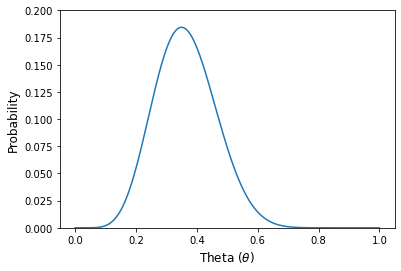

In [1]:
import scipy
def model(theta):
    return scipy.stats.binom(20,theta).pmf(7)
    
thetas = np.linspace(0,1,10**3) # Pick 1,000 equally spaced points between the values 0 and 1

fig,ax = plt.subplots()
ax.plot(thetas, model(thetas))

ax.set_xlabel(r"Theta $(\theta)$",fontsize=12)
ax.set_ylabel("Probability",fontsize=12)

ax.set_ylim(0,0.20)

plt.show()

One way to choose the best possible $\theta$ is to pick the $\theta$ value above that assigns the highest probability to the data point we observed. This is the idea of maximum likelihood (really). In our example it looks like the $\theta$ value we should choose is somewhere between 0.2 and 0.4.

### The probability of more than one data point when they are i.i.d.

Above we saw how parameters change the probability of a single data point.
But often we collect much more than a single data point and want to assign a probability to parameter values given 1,2,3 or, in general, $N$ data points.


#### One way to think about multiple data points 

To be clear, suppose we collect $N$ data points $(x_{1},x_{2},\cdots,x_{N})$ and want to compute the probability that these $N$ data points are observed.
If we are discussing the probability of data then there must be associated with these data points a sample space, outcomes, events, etc. 
One way to think about how your data set was generated is to say that associated with each data point $x_{i}$ is a random variable called $X_{i}$. The random variable $X_{i}$ is a function mapping events in a sample space to the real line. The random variable $X_{i}$ has a probability associated with each value on the real line. The data point $x_{i}$ is not random. Instead, $x_{i}$ was generated from the random variable $X_{i}$. 

When we ask about the probability of a data set then, we are asking to compute the probability $X_{1}=x_{1}$ **and** the probability $X_{2}=x_{2}$ **and** the probability $X_{3}=x_{3}$, and so on for all data points. We can write thie mathematically as 

\begin{align}
    p(X_{1}=x_{1} \cap X_{2}=x_{2} \cap X_{3}=x_{3} \cap \cdots \cap X_{N} = x_{N})
\end{align}

There are two shorthands to write the above. 
First, we can replace the $\cap$ with a comma. 
\begin{align}
    p(X_{1}=x_{1} , X_{2}=x_{2} , X_{3}=x_{3} , \cdots , X_{N} = x_{N})
\end{align}
Second, we can remove the random variables with the understanding that they do not need to be expliclty mentioned.
\begin{align}
    p(x_{1}, x_{2}, \cdots,x_{N})
\end{align}

### i.i.d
When we want to evaluate the probability of our data give a parameter, we wish to compute
\begin{align}
    p(x_{1}, x_{2}, \cdots,x_{N} | \theta)
\end{align}
for all possible choices of our parameters $\theta$. 

But how can we compute the above probability? 

Two often used assumptions are that (i) each data point $x_{i}$ was generated from a random variable $X_{i}$ following the same model or distribution, and (ii) each random variable $X_{i}$ (and so each data point) is indepndent from every other random variable. The first assumption is called identically distributed and the second assumption is called pairwise independence. 
These two assumptions are used together so often, we typicaloy say our data is **"independent and identically distributed"**

### How independence (the i in i.i.d) helps simplify

Independence can simplify the above probability. 
Lets look just at $p(x_{1}, x_{2}, \cdots,x_{N})$.
The mulplication rule says that we can break up the above proability into two conditional probabilities

\begin{align}
    p(x_{1}, x_{2}, \cdots,x_{N}) = p(x_{1}|x_{2},x_{3},\cdots,x_{N}) p(x_{2},x_{3},\cdots,x_{N}) 
\end{align}

To see why, we can assign the letter $A$ to the event (set) $\{x_{1}\}$ and the letter $B$ to the event (set) $\{x_{2} \cap x_{3} \cap \cdots \cap x_{N}\}$ then the above is our familar [multiplication rule]().

\begin{align}
    p(x_{1}, x_{2}, \cdots,x_{N}) &= p(x_{1}|x_{2},x_{3},\cdots,x_{N}) p(x_{2},x_{3},\cdots,x_{N}) \\
    p(A,B) &= p(A|B) p(B) 
\end{align}

But because each random variable associated with each data point is independent from one another, 

\begin{align}
    p(x_{1}, x_{2}, \cdots,x_{N}) &= p(x_{1}|x_{2},x_{3},\cdots,x_{N}) p(x_{2},x_{3},\cdots,x_{N})\\
                                  &= p(x_{1}) p(x_{2},x_{3},\cdots,x_{N})
\end{align} 
Above we used independence to "wipe out" the conditional probability. 

We can perform the same operation as above for the second data point

\begin{align}
   p(x_{1}) p(x_{2},x_{3},\cdots,x_{N}) &= p(x_{1}) p(x_{2}|x_{3},\cdots,x_{N}) p(x_{3},\cdots,x_{N})\\
                                        &= p(x_{1}) p(x_{2}) p(x_{3},\cdots,x_{N})
\end{align} 

and we can perform this same operation for the third, fourth, fifth data point, etc.

\begin{align}
   p(x_{1},x_{2},x_{3},\cdots,x_{N}) &= p(x_{1}) p(x_{2}) p(x_{3}) \cdots p(x_{N}) = \prod_{i=1}^{N} p(x_{i})
\end{align} 

The probability of our data set is the product of each individual probability. 

### How the identically distributed part of i.i.d helps

Assuming our data is independent,
\begin{align}
   p(x_{1},x_{2},x_{3},\cdots,x_{N}) &= \prod_{i=1}^{N} p(x_{i})
\end{align} 
But the data that is generated depends on an assumed model. 
To be more exact with the above we could have written

\begin{align}
   p(x_{1},x_{2},x_{3},\cdots,x_{N} | theta_{j}) &= \prod_{i=1}^{N} p_{i}(x_{i} | \theta_{i})
\end{align} 
where $p_{i}$ is the model associated with data point $i$ and $\theta_{i}$ is any parameter or parameters associated with model $i$. 
If however we assume the same model generated every data point than we can say a single set of parameters $\theta$ and single probability can characterize our data. 

\begin{align}
   p(x_{1},x_{2},x_{3},\cdots,x_{N} | \theta) &= \prod_{i=1}^{N} p(x_{i} | \theta)
\end{align} 

#### An example (finally)
Lets go back to our Binomial example above. 
We assumed that a single data point rcorded the number of successes out of 20 trials. 
Suppose we collect the following $5$ data points

- $x_{1} = 7$
- $x_{2} = 2$
- $x_{3} = 10$
- $x_{4} = 13$
- $x_{5} = 4$

Further assume that we think the same Binomial distribution with $N=20$ and $\theta=?$ generated all $5$ data points. 
Even further assume that each data point was generated from a random variable that is indepdnent of all other random variables. 
Then the probability of generating our data is

\begin{align}
    p(x_{1},x_{2},x_{3},x_{4},x_{5} | N, \theta) &= \prod_{i=1}^{5} p(x_{i}|N=20,\theta) \\ 
    &= \prod_{i=1}^{5} \binom{20}{x_{i}}\theta^{x_{i}}(1-\theta)^{20-x_{i}} \\ 
    f(\theta) &= \binom{20}{7}\theta^{7}(1-\theta)^{20-7} \times \binom{20}{2}\theta^{2}(1-\theta)^{20-2} \binom{20}{10}\theta^{10}(1-\theta)^{20-10} \times \binom{20}{13}\theta^{13}(1-\theta)^{20-13} \times \binom{20}{4}\theta^{4}(1-\theta)^{20-4}
\end{align}

The probability of our dataset is a function of a single parameter $\theta$.
We can plot this function for all possible values of $\theta$ from 0 to 1. 

Text(0, 0.5, '$f(\\theta)$')

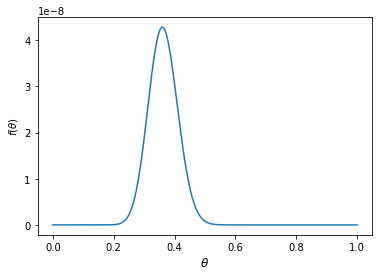

In [5]:
import numpy as np 
def f(theta):
    import scipy
    data = [7,2,10,13,4]
    
    result = 1. 
    for x in data:
        result = result * scipy.stats.binom(20,theta).pmf(x)
    return result

thetas = np.linspace(0,1,10**3)

fig,ax = plt.subplots()
ax.plot(thetas,f(thetas))

ax.set_xlabel(r"$\theta$",fontsize=12)
ax.set_ylabel(r"$f(\theta)$")


From the plot above it looks like the most likely $\theta$ value that generated our data set is somewhere close, but smaller, than 0.4.

## The Likelihood and LogLikelihood function

The function $f$ depends on parameters that are a part of our model an a fixed data set.
This function, for any choice of parameter values, returns the probability that choice of parameter values generated our dataset. Functions like this are called **likelihoods**. 

Though we can look at the likelihood of a set of parameters, this probability will typically be very small for any choice of parameter values. At times, these probabilities are so small that they are difficult, if not impossible, to represent in a computer. One way to overcome this limitation is to look at the logarithm of the likelihood---called the log likelihood. 

For a set of paramters $\theta$ and data points $\mathcal{D} = [x_{1},x_{2},x_{3},\cdots,x_{N}]$
\begin{align}
    \text{log likelihood} (\mathcal{D} | \theta) &= \log \left[ \prod_{i=1}^{N} p(x_{i} | \theta) \right] \\ 
                                                 &= \sum_{i=1}^{N} \log\left[ p(x_{i} | \theta) \right]
\end{align}

For our problem above, lets look at likelihood and the log likelihood side by side.

<ipython-input-10-f5c00945221c>:17: RuntimeWarning: divide by zero encountered in log
  result = result + np.log(scipy.stats.binom(20,theta).pmf(x))


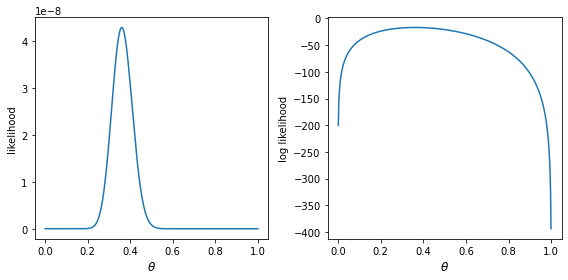

In [10]:
import numpy as np 
def likelihood(theta):
    import scipy
    data = [7,2,10,13,4]
    
    result = 1. 
    for x in data:
        result = result * scipy.stats.binom(20,theta).pmf(x)
    return result

def loglikelihood(theta):
    import scipy
    data = [7,2,10,13,4]
    
    result = 0 
    for x in data:
        result = result + np.log(scipy.stats.binom(20,theta).pmf(x))
    return result

thetas = np.linspace(0,1,10**3)

fig,axs = plt.subplots(1,2)

ax=axs[0]
ax.plot(thetas,likelihood(thetas))

ax.set_xlabel(r"$\theta$",fontsize=12)
ax.set_ylabel("likelihood")

ax=axs[1]
ax.plot(thetas,loglikelihood(thetas))

ax.set_xlabel(r"$\theta$",fontsize=12)
ax.set_ylabel("log likelihood")

fig.set_size_inches(8,4)
fig.set_tight_layout(True)

plt.show()

## An Example data set:

In [27]:
import pandas as pd
vaccinedata = pd.read_csv("https://data.cdc.gov/resource/8xkx-amqh.csv")
PA = vaccinedata.loc[vaccinedata.recip_state=="PA"]

PA = PA.loc[:,["series_complete_pop_pct","series_complete_yes"]]
PA = PA.rename(columns={"series_complete_pop_pct":"pctVacced","series_complete_yes":"numVacced"})
PA["numPop"] = (100*PA.numVacced/PA.pctVacced).round(0)

print("Number of Counties = {:d}".format(len(PA)))
PA

Number of Counties = 18


,pctVacced,numVacced,numPop
11,35.7,13730,38459.0
99,51.3,26324,51314.0
103,43.6,44946,103087.0
200,44.8,48996,109366.0
290,48.1,14389,29915.0
307,35.5,14417,40611.0
351,40.8,34520,84608.0
361,51.2,142546,278410.0
401,40.1,2433,6067.0
439,48.1,202720,421455.0


Lets suppose we have the following data on number of people eligible for a vaccine and the number who are fully vaccinated for 18 counties in Pennsylvania. 
If we assume that each county follows the same binomial distribution with $N$ equal to the number of eligible people and $\theta$ the probability somone becomes fully vaccinated, then we can write our likelihood---the probability of observing this data given our model---as


\begin{align}
    L(\theta) &= Binom(N=38,459,\theta,x=13,730) \times Binom(N=51,314,\theta,x=26,324) \times Binom(N=103,087,\theta,x=44,946) \times \cdots \times Binom(N=7,250,\theta,x=4,582) \times Binom(N=162,533,\theta,x=81,104)\\
    &=\binom{38,459}{13,730}\theta^{13,730}(1-\theta)^{38,459-13,730} \times \binom{51,314}{26,324}\theta^{26,324}(1-\theta)^{51,314-26,324} \times \binom{103,087}{44,946}\theta^{44,946}(1-\theta)^{103,087-44,946} \times \cdots \times \binom{7,250}{4,582}\theta^{4,582}(1-\theta)^{7,250-4,582} \times \binom{162,533}{81,104}\theta^{81,104}(1-\theta)^{162,533-81,104}
\end{align}

We can also look at the log likelihood, the sum of the log of each of the above probabilities. 
Let use the computer to plot the likelihood and log likelihood for potential $\theta$ values between 0 and 1. 

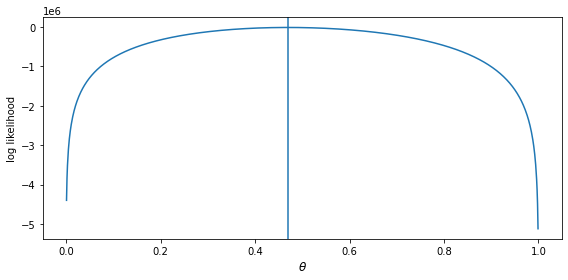

In [54]:
import numpy as np 

def loglikelihood(theta,Ns,xs):
    import scipy
    
    result = 0 
    for n,x in zip(Ns,xs):
        result = result + scipy.stats.binom(n,theta).logpmf(x)
    return result

Ns = list(PA.numPop.values)
xs = list(PA.numVacced.values)

thetas = np.linspace(0,1,10**3)

LL = []
for theta in thetas:
    LL.append(loglikelihood(theta,Ns,xs))
    
fig,ax = plt.subplots()

ax.plot(thetas,LL)

ax.set_xlabel(r"$\theta$",fontsize=12)
ax.set_ylabel("log likelihood")

ax.axvline(0.47)

fig.set_size_inches(8,4)
fig.set_tight_layout(True)

plt.show()

It looks like the maximum is somewhere around 0.4.
We can find the maximum using an optimiztion routine (lab will explore this topic) and we find that the maximum $\theta$ value---the value that maximizes the above log likelihood---is 0.47.
That is, if we assume each county in PA was independent and followed a Binomial distribution with the same probability an eligible person was fully vaccinated, the most likely probaility is 47%.

In [53]:
import scipy.optimize
LL = lambda theta: -1*loglikelihood(theta,Ns,xs)
maximumTheta = scipy.optimize.fmin(LL,0.5)
print(maximumTheta)

Optimization terminated successfully.
         Current function value: 9550.364433
         Iterations: 13
         Function evaluations: 26
[0.4696167]


## The loglikelihood as a random variable and it's sampling distribution

The loglikelihood allows us to find an optimal set of parameters that best explain our data.
But how stable is this set of "optimal parameters"? 
If we collected our dataset again would we arrive at the same optimal parameters? 

If we consider the loglikelihood a function of the set of $N$ random variables used to generate our dataset $\mathcal{D}$ our loglieklihood function too is random. 

Let's simulate five random variables all with the same binomial distribution.
For every simulation we will
 - Generate N observations 
 - Find the $\theta$ that maximizes loglikeliehood function
 - Store the maximum $\theta$
 - Plot a histogram of these optimal $\theta$s

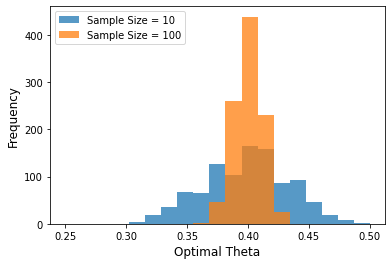

In [65]:
def simulateData(numberOfObs = 10):
    import numpy as np 
    data = np.random.binomial(size=numberOfObs,n=20,p=0.4)
    return data

def loglikelihood(theta,data):
    import scipy
    loglike = sum(scipy.stats.binom(20,theta).logpmf(data))
    return loglike

def findMaxTheta(data):
    import scipy.optimize
    LL = lambda theta: -1*loglikelihood(theta,data)
    maximumTheta = scipy.optimize.fmin(LL,0.5,disp=False)[0]
    return maximumTheta

#Sample Size of 10
maximumThetas10=[]
for sim in range(10**3):
    data = simulateData(10)
    maxTheta = findMaxTheta(data)
    
    maximumThetas10.append(maxTheta)

#Sample Size of 100
maximumThetas100=[]
for sim in range(10**3):
    data = simulateData(100)
    maxTheta = findMaxTheta(data)
    
    maximumThetas100.append(maxTheta)
    
fig,ax = plt.subplots()

bins = np.linspace(0.25,0.5,20)

ax.hist(maximumThetas10,bins,label="Sample Size = 10",alpha=0.75)
ax.hist(maximumThetas100,bins,label="Sample Size = 100",alpha=0.75)

ax.set_xlabel("Optimal Theta",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)

ax.legend()

plt.show()

The above figure shows the optimal theta value using the loglikelihood for 1000 simulations of a data set of size 10 (blue) and another 1000 simulations of a data set of size 100. All simulations generated data from a Binomial distribution with $N=20$ and $\theta=0.4$. 

We observe that the maximum $\theta$ for both sets of simulations appears to be centered around 0.4, the true value for $\theta$. With a larger sample size the variability in the maximum theta is smaller than for a smaller sample size. Both histograms look bell-shaped and may be well approximated by a Normal distribution. 

There is an extensive theory about how the maximum parameters vary.
We see here empirically that the sampling distribution of the maximum parameters follows a Normal distribution with the mean equal to our maximum $\theta$.
Working out the variance is beyond the scope of this class.